In [70]:
import pandas as pd

file = '../HW4/nyc_311_limit.2020.csv'
df = pd.read_csv(file)
df.columns = ['unique_key', 'created_date', 'closed_date', 'agency', 'agency_name', 'complaint_type', 'descriptor', 'location_type', 'incident_zip', 'incident_address', 'street_name', 'cross_street_1', 'cross_street_2', 'intersection_street_1', 'intersection_street_2', 'address_type', 'city', 'landmark', 'facility_type', 'status', 'due_date', 'resolution_description', 'resolution_action_updated_date', 'community_board', 'bbl', 'borough', 'x_coordinate_state_plane', 'y_coordinate_state_plane', 'open_data_channel_type', 'park_facility_name', 'park_borough', 'vehicle_type', 'taxi_company_borough', 'taxi_pick_up_location', 'bridge_highway_name', 'bridge_highway_direction', 'road_ramp', 'bridge_highway_segment', 'latitude', 'longitude', 'location']
df['created_date'] = pd.to_datetime(df['created_date'])
df['closed_date'] = pd.to_datetime(df['closed_date'])

# df.to_csv(file, index=False)

C:\Users\danli\AppData\Local\Temp\ipykernel_13916\3809623836.py:4: DtypeWarning: Columns (20,31,32,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


In [71]:
df = df[df['complaint_type'].str.contains('Noise')]
df['month'] = df['created_date'].dt.month
df = df[['unique_key', 'descriptor', 'month']]
df = df[df['descriptor'] != 'Other']
print(df.head(5))

     unique_key        descriptor  month
92     46820362  Loud Music/Party      7
103    46863455  Loud Music/Party      7
104    46820777  Loud Music/Party      7
105    46824033   Car/Truck Music      7
106    46823853  Loud Music/Party      7


In [72]:
grouped_df = df.groupby(['descriptor', 'month'], as_index=False).count()
grouped_df.rename(columns={'unique_key': 'count'}, inplace=True)
print(grouped_df)

                           descriptor  month  count
0           21 Collection Truck Noise      9      1
1                    Banging/Pounding      1   7269
2                    Banging/Pounding      2   6807
3                    Banging/Pounding      3   7840
4                    Banging/Pounding      4   8576
..                                ...    ...    ...
192  Noise: lawn care equipment (NCL)      4     39
193  Noise: lawn care equipment (NCL)      5     87
194  Noise: lawn care equipment (NCL)      6     77
195  Noise: lawn care equipment (NCL)      7     61
196  Noise: lawn care equipment (NCL)      8     16

[197 rows x 3 columns]


In [73]:
sorted_df = grouped_df.groupby(['month'], as_index=False).max()
print(sorted_df)

   month                                        descriptor  count
0      1                  Noise: lawn care equipment (NCL)  14234
1      2                  Noise: lawn care equipment (NCL)  13291
2      3                  Noise: lawn care equipment (NCL)  17311
3      4                  Noise: lawn care equipment (NCL)  20389
4      5                  Noise: lawn care equipment (NCL)  48723
5      6                  Noise: lawn care equipment (NCL)  74386
6      7                  Noise: lawn care equipment (NCL)  67372
7      8                  Noise: lawn care equipment (NCL)  76901
8      9  Noise: air condition/ventilation equipment (NV1)  69470


Text(0.5, 1.0, 'Top noise complaint descriptor per month (excluding other)')

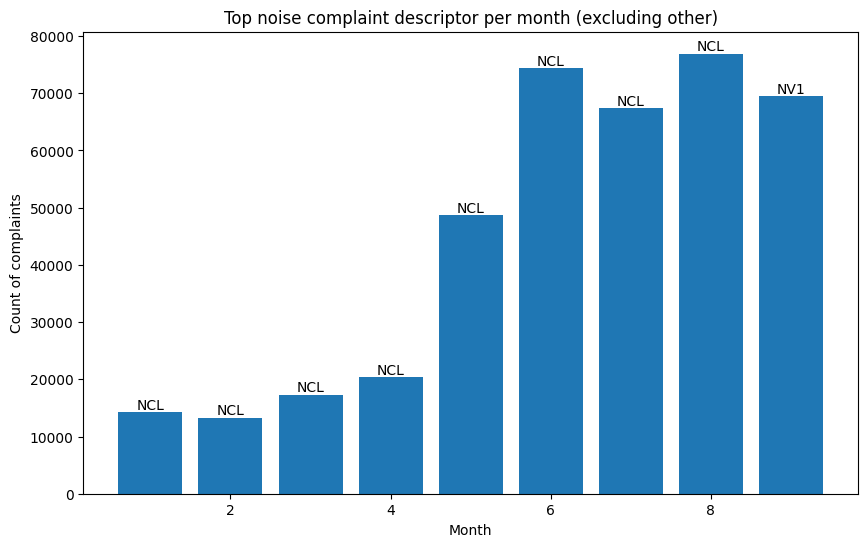

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (10, 6))

bar_fig = plt.bar(sorted_df['month'], sorted_df['count'])
# Shortern labels because all of the outputs are abbreviated at the end
plt.bar_label(bar_fig, labels= [l[-4:-1] for l in sorted_df['descriptor']])

plt.xlabel('Month')
plt.ylabel('Count of complaints')
plt.title('Top noise complaint descriptor per month (excluding other)')